## Data Description

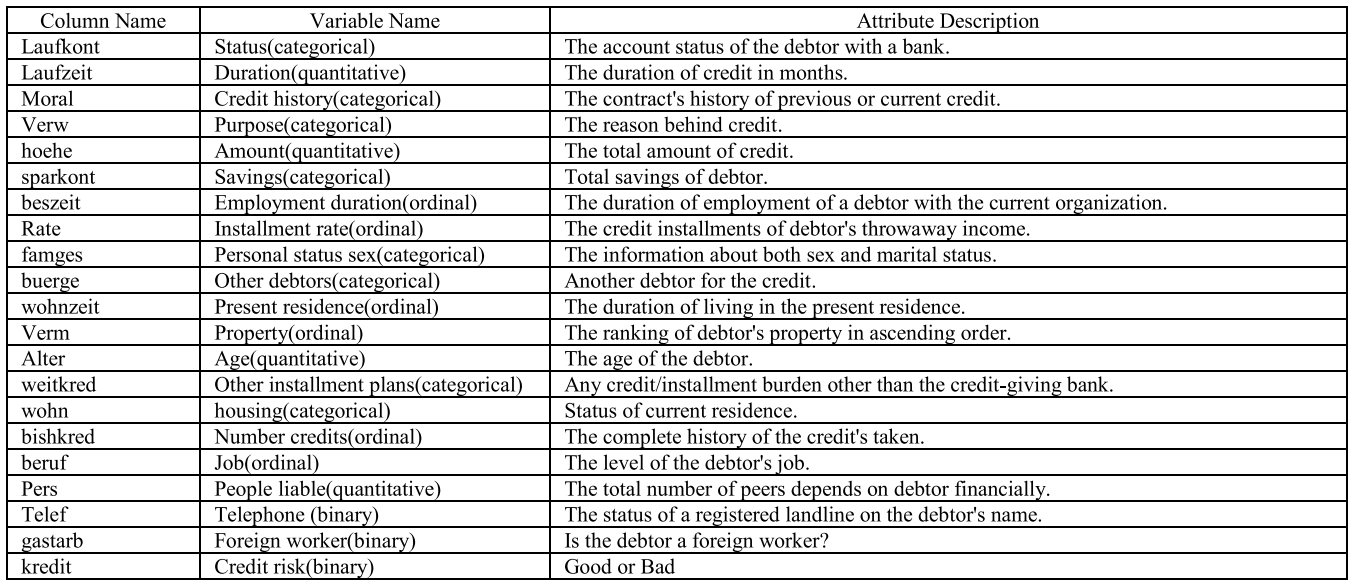

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler , LabelEncoder
from sklearn.model_selection import train_test_split , KFold , GridSearchCV , cross_val_score , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , plot_confusion_matrix , plot_roc_curve , roc_auc_score ,\
roc_curve , plot_roc_curve , plot_precision_recall_curve , precision_recall_curve
import statistics as stats

In [2]:
df = pd.read_csv('South_german_credit_default.csv')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
df.shape

(1000, 21)

In [4]:
df.isnull().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
df[df.duplicated()]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit


# Data Cleaning

## Credit column

In [27]:
df['kredit'].unique()

array([1.0000000e+00, 0.0000000e+00, 3.2656739e+03, 2.0903000e+01])

In [28]:
df[df['kredit'] == df['kredit'].unique()[2]] = stats.mode(df['kredit'])

In [29]:
df[df['kredit'] == df['kredit'].unique()[2]] = stats.mode(df['kredit'])

In [30]:
df['kredit'].unique()

array([1., 0.])

## Foreigners (binary) column

In [12]:
df['gastarb'].unique()

array([2, 1], dtype=int64)

In [13]:
label = LabelEncoder()
df['gastarb'] = label.fit_transform(df['gastarb'])
df['gastarb'].unique()

array([1, 0], dtype=int64)

# Data Visualisation

## Checking outliers on quantative atrributes

Text(0.5, 1.0, 'Boxplot of Age')

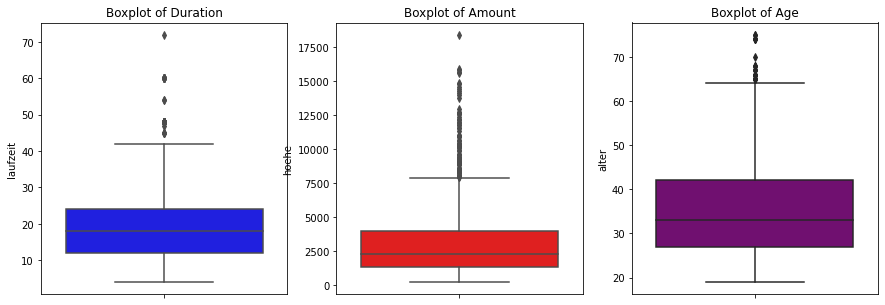

In [14]:
fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(df['laufzeit'] , orient = 'v' , color = 'b' ,ax = ax1)
ax1.set_title('Boxplot of Duration')

sns.boxplot(df['hoehe'] , orient = 'v' , color = 'r' ,ax = ax2)
ax2.set_title('Boxplot of Amount')

sns.boxplot(df['alter'] , orient = 'v' , color = 'purple' ,ax = ax3)
ax3.set_title('Boxplot of Age')

Text(0.5, 1.0, 'Distribution plot of Age')

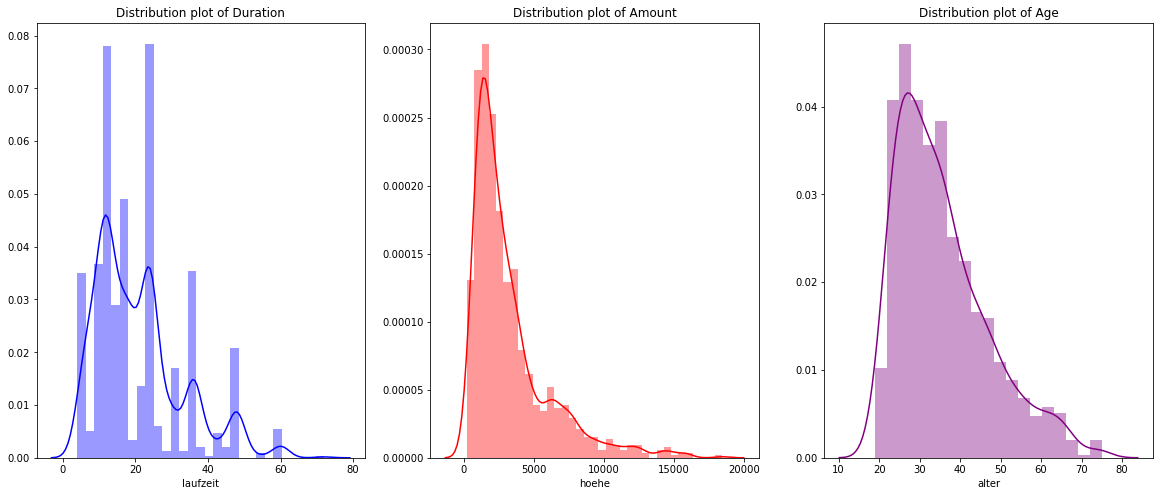

In [15]:
fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (20,8))

sns.distplot(df['laufzeit'] , color = 'b' ,ax = ax1)
ax1.set_title('Distribution plot of Duration')

sns.distplot(df['hoehe'] , color = 'r' ,ax = ax2)
ax2.set_title('Distribution plot of Amount')

sns.distplot(df['alter'] , color = 'purple' ,ax = ax3)
ax3.set_title('Distribution plot of Age')

### Handling outliers

#### 1. Duration

In [16]:
df[df['laufzeit'] > 60]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
719,2,72,2,3,5595,2,3,2,4,1,...,3,24,3,2,1,3,2,1,1,0


In [17]:
df[df['laufzeit'] > 60] = df['laufzeit'].mean()

In [18]:
df[df['laufzeit'] > 60]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit


#### 2. Amount

In [19]:
df[df['hoehe'] > 13000]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
382,4.0,60.0,4.0,0.0,13756.0,5.0,5.0,2.0,3.0,1.0,...,4.0,63.0,1.0,3.0,1.0,4.0,2.0,2.0,1.0,1.0
442,1.0,39.0,4.0,2.0,14179.0,5.0,4.0,4.0,3.0,1.0,...,2.0,30.0,3.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0
645,1.0,36.0,2.0,10.0,15857.0,1.0,1.0,2.0,1.0,2.0,...,3.0,43.0,3.0,2.0,1.0,4.0,2.0,1.0,1.0,1.0
695,4.0,60.0,3.0,3.0,15653.0,1.0,4.0,2.0,3.0,1.0,...,3.0,21.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0
754,2.0,6.0,2.0,0.0,14555.0,5.0,1.0,1.0,3.0,1.0,...,2.0,23.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0
782,2.0,36.0,2.0,0.0,14318.0,1.0,5.0,4.0,3.0,1.0,...,4.0,57.0,3.0,3.0,1.0,4.0,2.0,2.0,1.0,0.0
810,2.0,48.0,2.0,9.0,15672.0,1.0,3.0,2.0,3.0,1.0,...,3.0,23.0,3.0,2.0,1.0,3.0,2.0,2.0,1.0,0.0
847,2.0,60.0,1.0,10.0,14782.0,2.0,5.0,3.0,2.0,1.0,...,4.0,60.0,1.0,3.0,2.0,4.0,2.0,2.0,1.0,0.0
890,2.0,60.0,2.0,0.0,14027.0,1.0,4.0,4.0,3.0,1.0,...,4.0,27.0,3.0,2.0,1.0,4.0,2.0,2.0,1.0,0.0
929,2.0,48.0,0.0,9.0,14421.0,1.0,3.0,2.0,3.0,1.0,...,3.0,25.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,0.0


In [20]:
df[df['hoehe'] > 13000] = df['hoehe'].mean()

In [21]:
df[df['hoehe'] > 13000]

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit


### Correlation plot

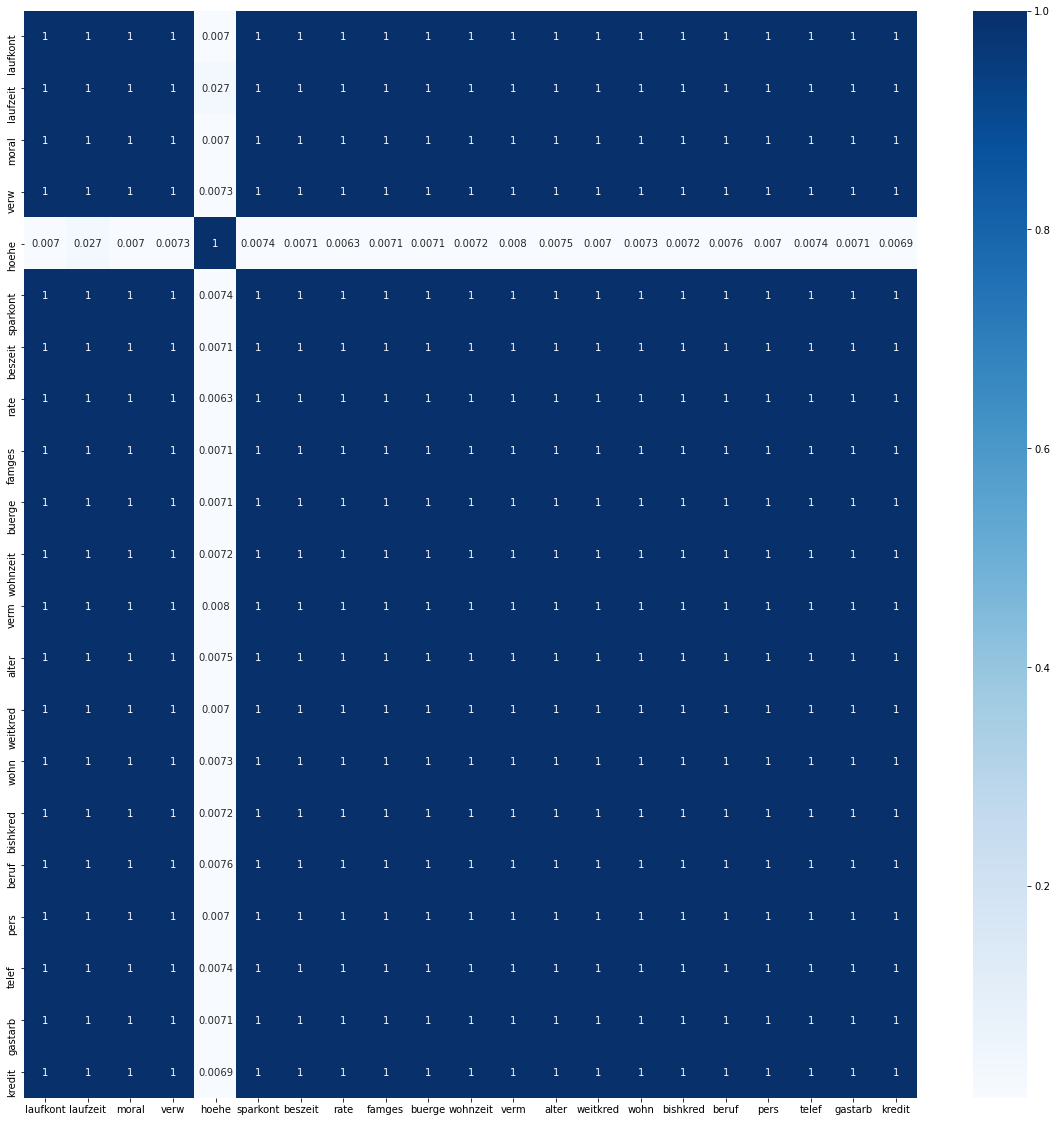

In [22]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr() , cmap = 'Blues' , annot = True)

In [23]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['kredit'],columns = df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()


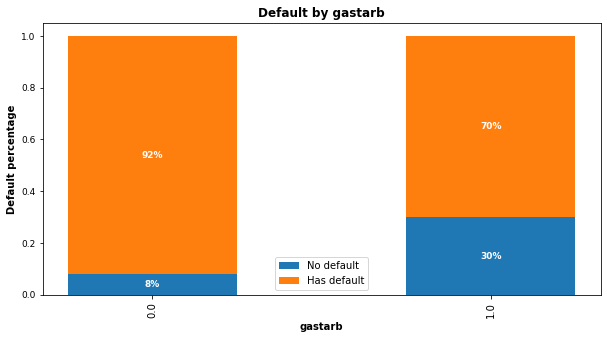

In [31]:
create_stacked_bar('gastarb')

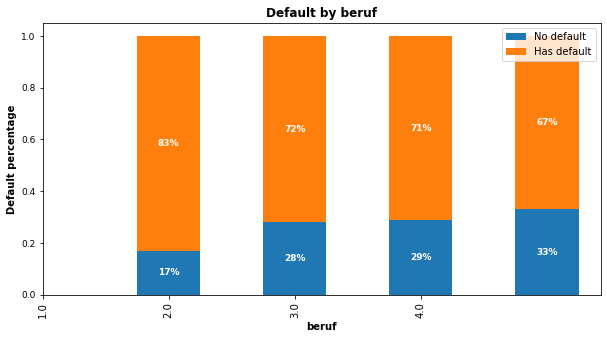

In [32]:
create_stacked_bar('beruf')

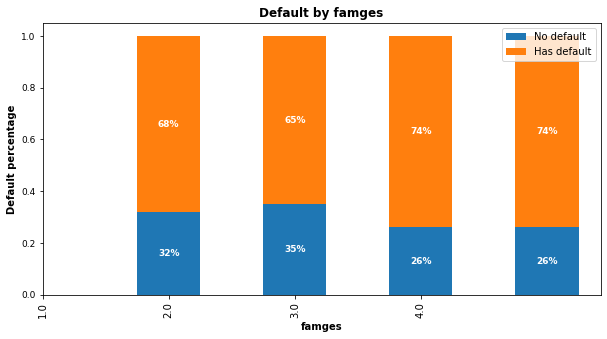

In [33]:
create_stacked_bar('famges')

### Checking class imbalance

1.0    0.71
0.0    0.29
Name: kredit, dtype: float64


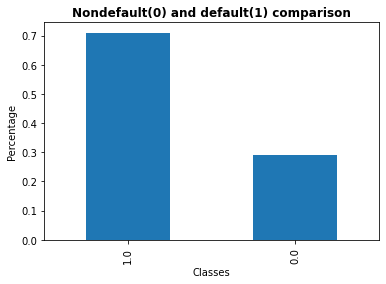

In [34]:
# Check target classes balance
cla_bal = df['kredit'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

# Data Pre-processing

## Handling imbalanced class

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state= 42)
X, y = sm.fit_resample(df.drop(['kredit'] , axis = 1),df['kredit'].ravel())

0.0    0.5
1.0    0.5
Name: Class, dtype: float64


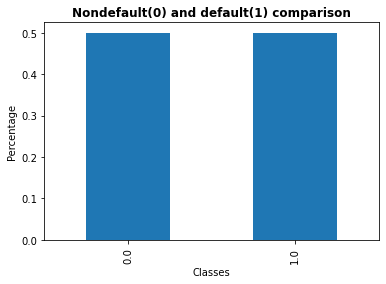

In [37]:
# Check target classes balance
df2 = pd.DataFrame(y , columns= ['Class'])
cla_bal = df2['Class'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

## Standardizing numerical attributes

In [38]:
scaler = RobustScaler()

X['laufzeit'] = scaler.fit_transform(X['laufzeit'].values.reshape(-1,1))
X['hoehe'] = scaler.fit_transform(X['hoehe'].values.reshape(-1,1))
X['alter'] = scaler.fit_transform(X['alter'].values.reshape(-1,1))

## Splitting into Training and Testing data

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.30 , random_state= 42)
print(X_train.shape , '\n' , X_test.shape , '\n', y_train.shape , '\n' , y_test.shape)

(994, 20) 
 (426, 20) 
 (994,) 
 (426,)


# Modelling

## 1. Logistic Regression

In [40]:
clf_lr = LogisticRegression(random_state = 42)

In [41]:
clf_lr.fit(X_train , y_train)

LogisticRegression(random_state=42)

In [42]:
scores = cross_val_score(clf_lr , X_train , y_train , scoring = "roc_auc" , cv = 10)
roc_auc_lr = np.mean(scores)

In [43]:
# Creating a dataframe to keep record of auc scores
model = []
roc_auc = []
def performance(new_model , new_score):
    model.append(new_model)
    roc_auc.append(new_score)
    score_df = pd.DataFrame(zip(model , roc_auc) , columns = ['Model', 'ROC_AUC_Score'])
    #print(score_df)
    return score_df

In [44]:
performance('Logistic Regression', roc_auc_lr)

,Model,ROC_AUC_Score
0,Logistic Regression,0.797741


In [45]:
# Define a function to compute Precision, Recall and F1 score
model_name = []
precision_list = []
recall_list = []
F1_list = []
def get_pre_rec_f1(model , new_model_name):

    if new_model_name == 'Artificial Neural Network':
        model_name.append(new_model_name)
        proba = model.predict_proba(X_test)
        y_pred_ann = (proba > 0.5)
        roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred_ann).ravel()
        precision = tp / (tp + fp)
        precision_list.append(precision)
        recall = tp / (tp + fn)
        recall_list.append(recall)
        F1 = (2 * precision * recall) / (precision + recall)
        F1_list.append(F1)
        evaluation_df = pd.DataFrame(zip(model_name , precision_list , recall_list , F1_list) , columns = \
                                 ['Model','Precision', 'Recall', 'F1_Score'])
        #print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
        return evaluation_df
    else: 
        model_name.append(new_model_name)
        y_pred = model.predict(X_test)
        tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
        precision = tp / (tp + fp)
        precision_list.append(precision)
        recall = tp / (tp + fn)
        recall_list.append(recall)
        F1 = (2 * precision * recall) / (precision + recall)
        F1_list.append(F1)
        evaluation_df = pd.DataFrame(zip(model_name , precision_list , recall_list , F1_list) , columns = \
                                 ['Model','Precision', 'Recall', 'F1_Score'])
        #print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
        return evaluation_df

In [46]:
# Calculate precision, recall and F1 of Logistic Regression Model
get_pre_rec_f1(clf_lr , 'Logistic Regression')

,Model,Precision,Recall,F1_Score
0,Logistic Regression,0.775229,0.734783,0.754464


## 2. Random Forest

In [47]:
# Hyperparameter tuning

# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 110,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [48]:
# Use the best parameters to fit the model

clf_rf = RandomForestClassifier(**grid_search.best_params_)   
clf_rf.fit(X_train,y_train)

scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_rf = np.mean(scores)
performance('Random Forest', roc_auc_rf)

,Model,ROC_AUC_Score
0,Logistic Regression,0.797741
1,Random Forest,0.917979


In [49]:
get_pre_rec_f1(clf_rf , 'Random Forest')

,Model,Precision,Recall,F1_Score
0,Logistic Regression,0.775229,0.734783,0.754464
1,Random Forest,0.853211,0.861111,0.857143


## 3. XGBoost

In [50]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.4,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [51]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 5, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)   

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[18:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'subsample': 0.7, 'scale_pos_weight': 3.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7} 0.9085788933167347


In [52]:
# Use the best parameters to fit the model

clf_xgb = XGBClassifier(**xgb_random.best_params_)   
clf_xgb.fit(X_train,y_train)

scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)
performance('XGBoost', roc_auc_xgb)

[18:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,ROC_AUC_Score
0,Logistic Regression,0.797741
1,Random Forest,0.917979
2,XGBoost,0.918460


In [53]:
get_pre_rec_f1(clf_xgb , 'XGBoost')

,Model,Precision,Recall,F1_Score
0,Logistic Regression,0.775229,0.734783,0.754464
1,Random Forest,0.853211,0.861111,0.857143
2,XGBoost,0.807339,0.902564,0.852300


## 4. Artificial Neural Network

In [54]:
# y_train = np.array(y_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)
clf_ann = Sequential()
clf_ann.add(Dense( units = 32 , activation = 'relu' , input_dim = X.shape[1]))
clf_ann.add(Dense( units = 16 , activation = 'relu'))
clf_ann.add(Dense( units = 1 , activation = 'sigmoid'))
clf_ann.compile(optimizer= 'adam' , loss = 'binary_crossentropy' , metrics= ['accuracy'])
clf_ann.fit(X_train , y_train , batch_size = 50 , epochs = 20  , validation_data= (X_test , y_test))

Epoch 1/20
20/20 [==============================] - 1s 9ms/step - loss: 0.7340 - accuracy: 0.4839 - val_loss: 0.6863 - val_accuracy: 0.5493
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.6117 - val_loss: 0.6442 - val_accuracy: 0.7019
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6841 - val_loss: 0.6085 - val_accuracy: 0.6972
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7002 - val_loss: 0.5843 - val_accuracy: 0.7136
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7082 - val_loss: 0.5683 - val_accuracy: 0.7160
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7103 - val_loss: 0.5613 - val_accuracy: 0.7254
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.7233 - val_loss: 0.5501 - val_accuracy: 0.7324
Epoch 8/20
20/20 [==

In [55]:
# Calculating ROC_AUC score

proba = clf_ann.predict_proba(X_test)
y_pred_ann = (proba > 0.5)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
performance('Artificial Neural Network', roc_auc_ann)

,Model,ROC_AUC_Score
0,Logistic Regression,0.797741
1,Random Forest,0.917979
2,XGBoost,0.918460
3,Artificial Neural Network,0.747971


In [56]:
get_pre_rec_f1(clf_ann , 'Artificial Neural Network')

,Model,Precision,Recall,F1_Score
0,Logistic Regression,0.775229,0.734783,0.754464
1,Random Forest,0.853211,0.861111,0.857143
2,XGBoost,0.807339,0.902564,0.852300
3,Artificial Neural Network,0.784404,0.740260,0.761693


## 5. Naive Bayes

In [57]:
clf_gnb = GaussianNB()

In [58]:
clf_gnb.fit(X_train , y_train)

GaussianNB()

In [59]:
scores = cross_val_score(clf_gnb , X_train , y_train , cv = 5 , scoring = "roc_auc")
roc_auc_gnb = np.mean(scores)
auc_df = performance('Gaussian NB' , roc_auc_gnb)
auc_df

,Model,ROC_AUC_Score
0,Logistic Regression,0.797741
1,Random Forest,0.917979
2,XGBoost,0.918460
3,Artificial Neural Network,0.747971
4,Gaussian NB,0.797332


In [60]:
evaluation_df = get_pre_rec_f1(clf_gnb , 'Gaussian Naive Bayes')

In [62]:
evaluation_df['ROC_AUC_Score'] = auc_df['ROC_AUC_Score']
evaluation_df

,Model,Precision,Recall,F1_Score,ROC_AUC_Score
0,Logistic Regression,0.775229,0.734783,0.754464,0.797741
1,Random Forest,0.853211,0.861111,0.857143,0.917979
2,XGBoost,0.807339,0.902564,0.852300,0.918460
3,Artificial Neural Network,0.784404,0.740260,0.761693,0.747971
4,Gaussian Naive Bayes,0.876147,0.679715,0.765531,0.797332
